In [1]:
import tensorflow as tf
import numpy as np

In [2]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype = 'int32')
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype = 'int32')

print (matrix1)
print (matrix2)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [3]:
matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)
matrix1

<tf.Tensor 'Const:0' shape=(3, 3) dtype=int32>

In [4]:
print(matrix1)

Tensor("Const:0", shape=(3, 3), dtype=int32)


In [5]:
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1,matrix2)
matrix_3 = np.array([(2,7,2),(1,4,2),(9,0,2)],dtype = 'float32')

matrix_det = tf.matrix_determinant(matrix_3)
with tf.Session() as sess:
   result1 = sess.run(matrix_product)
   result2 = sess.run(matrix_sum)
   result3 = sess.run(matrix_det)

In [6]:
result1

array([[6, 6, 6],
       [6, 6, 6],
       [6, 6, 6]])

In [7]:
result2

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

In [8]:
result3

55.999992

In [14]:
var1=tf.Variable(matrix_3)

Instructions for updating:
Colocations handled automatically by placer.


In [1]:
import pickle
with open("test_data\\mnist.pkl","rb") as pickle_in:
    train_set, valid_set, test_set = pickle.load(pickle_in, encoding='latin1')

In [2]:
import numpy as np
train_set_y=np.asarray(pd.get_dummies(train_set[1]))
valid_set_y=np.asarray(pd.get_dummies(valid_set[1]))
test_set_y=np.asarray(pd.get_dummies(test_set[1]))

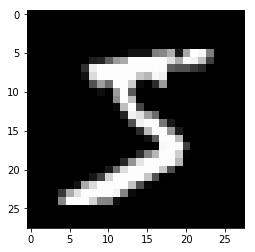

In [66]:
im=train_set[0][0].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(im,cmap='gray')
plt.show()

In [76]:
len(train_set[1])

50000

# Single layer perceptron

In [77]:
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

x = tf.placeholder("float", shape=(None, 784))  # mnist data image of shape 28*28=784
y = tf.placeholder("float", shape=(None, 10)) # 0-9 digits recognition => 10 classes

w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

activation=tf.nn.softmax(tf.matmul(x,w)+b)
cross_entropy=y*tf.log(activation)
cost=tf.reduce_mean(-tf.reduce_sum(cross_entropy,1))
model=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)


In [118]:
def next_batch(data,label,num):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    label_shuffle=[label[i] for i in idx]
    #label_shuffle=pd.get_dummies(label_shuffle)
    return np.asarray(data_shuffle),np.asarray(label_shuffle)

In [105]:
batch_x,batch_y=next_batch(train_set[0],train_set[1],batch_size)

In [151]:
avg_cost=[]
epoch_=[]
init = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(init)
    total_batch=int(50000/batch_size)
    for epoch in range(training_epochs):
        avg_=0
        for i in range(total_batch):
            batch_x,batch_y=next_batch(train_set[0],train_set_y,batch_size)
            session.run(model,feed_dict={x:batch_x,y:batch_y})
            avg_=avg_+session.run(cost,feed_dict={x:batch_x,y:batch_y})/total_batch
       # print(epoch,avg_)
        avg_cost.append(avg_)
        epoch_.append(epoch)
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("train accuracy: {}".format(accuracy.eval({x:train_set[0],y:train_set_y})))
    print("test accuracy: {}".format(accuracy.eval({x:test_set[0],y:test_set_y})))
        

train accuracy: 0.9304800033569336
test accuracy: 0.9214000105857849


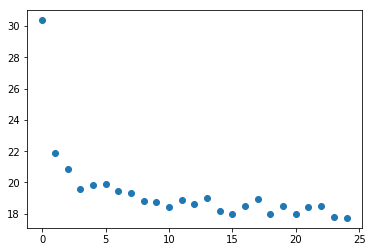

In [149]:
plt.plot(epoch_,avg_cost,'o')

# Multiple layer perceptron

In [181]:
n_hidden_1=256
n_hidden_2=256
learning_rate=0.001
training_epochs = 25
batch_size = 100


x = tf.placeholder("float", shape=(None, 784))  # mnist data image of shape 28*28=784
y = tf.placeholder("float", shape=(None, 10)) # 0-9 digits recognition => 10 classes

w1=tf.Variable(tf.random_normal([784,n_hidden_1]))
b1=tf.Variable(tf.random_normal([n_hidden_1]))
layer1=tf.nn.relu(tf.matmul(x,w1)+b1)

w2=tf.Variable(tf.random_uniform([n_hidden_1,n_hidden_2]))
b2=tf.Variable(tf.random_uniform([n_hidden_2]))
layer2=tf.nn.relu(tf.matmul(layer1,w2)+b2)

w3=tf.Variable(tf.truncated_normal([n_hidden_2,10],stddev=0.1))
b3=tf.Variable(tf.truncated_normal([10],stddev=0.1))
layer3=tf.matmul(layer2,w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer3, labels=y))
#cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=layer3, labels=y))
model=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [182]:
avg_cost=[]
epoch_=[]
init = tf.initialize_all_variables()

with tf.Session() as session:
    for epoch in range(training_epochs):
        avg_=0
        total_batch=int(50000/batch_size)
        session.run(init)
        for i in range(int(total_batch)):
            batch_x,batch_y=next_batch(train_set[0],train_set_y,batch_size)
            session.run(model,feed_dict={x:batch_x,y:batch_y})
            avg_=avg_+session.run(cost,feed_dict={x:batch_x,y:batch_y})/total_batch
        avg_cost.append(avg_)
        epoch_.append(epoch)
    correct_prediction = tf.equal(tf.argmax(layer3, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("train accuracy: {}".format(accuracy.eval({x:train_set[0],y:train_set_y})))
    print("test accuracy: {}".format(accuracy.eval({x:test_set[0],y:test_set_y})))
        
            
        

train accuracy: 0.8394399881362915
test accuracy: 0.8443999886512756


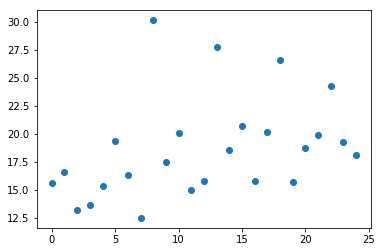

In [183]:
plt.plot(epoch_,avg_cost,'o')

# Keras DNN

In [184]:
from keras.models import Sequential
from keras.layers import Dense

In [192]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [193]:
model.fit(train_set[0],train_set_y,epochs=25,batch_size=100)

Epoch 1/25
50000/50000 [==============================] - 2s 32us/step - loss: 0.4027 - acc: 0.8853
Epoch 2/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.1670 - acc: 0.9509
Epoch 3/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.1198 - acc: 0.9659
Epoch 4/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.0960 - acc: 0.9718
Epoch 5/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.0792 - acc: 0.9762
Epoch 6/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.0666 - acc: 0.9805
Epoch 7/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.0569 - acc: 0.9827
Epoch 8/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.0474 - acc: 0.9863
Epoch 9/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.0430 - acc: 0.9868
Epoch 10/25
50000/50000 [==============================] - 1s 15us/step - loss: 0.0361 - acc: 0.9892

In [195]:
model.evaluate(train_set[0],train_set_y)

50000/50000 [==============================] - 1s 19us/step


[0.005375660678290733, 0.99856]

In [196]:
model.evaluate(test_set[0],test_set_y)

10000/10000 [==============================] - 0s 17us/step


[0.11954510413074494, 0.9741]

In [218]:
model.predict(valid_set[0][:1]).argmax()

3

In [219]:
valid_set[1][0]

3

# CNN

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPool2D

In [12]:
train_set_x=train_set[0].reshape(50000,28,28,1)
test_set_x=test_set[0].reshape(test_set[0].shape[0],28,28,1)

In [6]:
model2=Sequential()
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [22]:
model2.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

history=model2.fit(train_set_x,train_set_y,epochs=10,batch_size=100,validation_split=0.1)

Epoch 1/10
50000/50000 [==============================] - 23s 461us/step - loss: 0.0257 - acc: 0.9916
Epoch 2/10
50000/50000 [==============================] - 23s 453us/step - loss: 0.0241 - acc: 0.9917
Epoch 3/10
50000/50000 [==============================] - 23s 458us/step - loss: 0.0220 - acc: 0.9926
Epoch 4/10
50000/50000 [==============================] - 23s 455us/step - loss: 0.0193 - acc: 0.9932
Epoch 5/10
50000/50000 [==============================] - 23s 456us/step - loss: 0.0196 - acc: 0.9934
Epoch 6/10
50000/50000 [==============================] - 23s 456us/step - loss: 0.0185 - acc: 0.9937
Epoch 7/10
50000/50000 [==============================] - 23s 458us/step - loss: 0.0166 - acc: 0.9945
Epoch 8/10
50000/50000 [==============================] - 23s 461us/step - loss: 0.0145 - acc: 0.9949
Epoch 9/10
50000/50000 [==============================] - 23s 458us/step - loss: 0.0150 - acc: 0.9949
Epoch 10/10
50000/50000 [==============================] - 23s 458us/step - loss: 

In [23]:
model2.evaluate(test_set_x,test_set_y)

10000/10000 [==============================] - 1s 148us/step


[0.025696198427307172, 0.9919]

In [26]:
history.history.keys()

dict_keys(['loss', 'acc'])

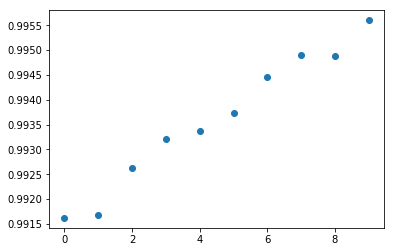

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],'o')
plt.show()

In [29]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
__________